<a href="https://colab.research.google.com/github/Art9521/Art9521/blob/main/Parkinsons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Введение**

Болезнь Паркинсона (БП) — это прогрессирующее нейродегенеративное заболевание, которое влияет на центральную нервную систему и вызывает тремор, скованность и проблемы с координацией. Ранняя диагностика болезни Паркинсона чрезвычайно важна, так как позволяет пациентам получить своевременное лечение и поддержку, что может существенно улучшить качество их жизни.

Данный проект направлен на разработку модели машинного обучения, которая способна предсказать наличие болезни Паркинсона на ранней стадии с использованием алгоритма XGBoost. Мы будем использовать данные из набора данных UCI ML Parkinsons.

**Задачи**

1.  Загрузка и предварительная обработка данных
2.  Разделение данных на обучающую и тестовую выборки
3.  Нормализация признаков
4.  Создание и обучение модели XGBoost
5.  Оценка точности модели
6.  Визуализация результатов
7.  Измерение времени выполнения основных этапов

**Импорт библиотек**

Код начинается с импорта необходимых библиотек и установки пакетов.

**Загрузка и предварительная обработка данных**

Код загружает данные из файла и выводит первые строки для ознакомления с их структурой.

**Разделение данных на обучающую и тестовую выборки**

Данные разделяются на обучающую и тестовую выборки в соотношении 80/20.

**Нормализация признаков**

Признаки нормализуются с использованием StandardScaler.

**Настройка гиперпараметров с помощью GridSearchCV**

Создается модель XGBoost и настраиваются её гиперпараметры с помощью GridSearchCV для достижения наилучшей производительности.

**Оценка точности модели**

Модель оценивается на тестовой выборке, вычисляется точность и время, затраченное на предсказание.

**Визуализация результатов**

Визуализация включает графики важности признаков, матрицу корреляции и ROC-кривую.

**Вывод**

Проект предоставляет инструменты для ранней диагностики болезни Паркинсона, что может значительно улучшить качество жизни пациентов за счет своевременного лечения и поддержки.

In [ ]:
!pip install xgboost
!pip install seaborn

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
import gdown

In [ ]:
# Скачивание файла с Google Drive
file_id = '1ZSfXXqEONPo1s_C1Uv_BB64PBwNt3Ci5'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'parkinsons.data'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1ZSfXXqEONPo1s_C1Uv_BB64PBwNt3Ci5
To: /content/parkinsons.data
100%|██████████| 40.7k/40.7k [00:00<00:00, 41.2MB/s]


'parkinsons.data'

In [ ]:
# Загрузка данных
data = pd.read_csv(output)

# Просмотр первых строк датасета
print(data.head())


             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654

In [ ]:
# Выделение признаков и метки
X = data.drop(['name', 'status'], axis=1)
y = data['status']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Нормализация признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Настройка гиперпараметров с помощью GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Замер времени обучения модели с GridSearchCV
start_time = time.time()

In [ ]:
# Создание модели
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

In [ ]:
# Настройка GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

training_time = time.time() - start_time
print(f"Training time with GridSearchCV: {training_time:.2f} seconds")

# Лучшие параметры
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')

# Оценка модели с лучшими параметрами
best_model = grid_search.best_estimator_

start_time = time.time()
y_pred = best_model.predict(X_test_scaled)
prediction_time = time.time() - start_time

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with best parameters: {accuracy * 100:.2f}%')
print(f"Prediction time: {prediction_time:.2f} seconds")


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Training time with GridSearchCV: 12.47 seconds
Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}
Accuracy with best parameters: 92.31%
Prediction time: 0.00 seconds


<Figure size 1000x800 with 0 Axes>

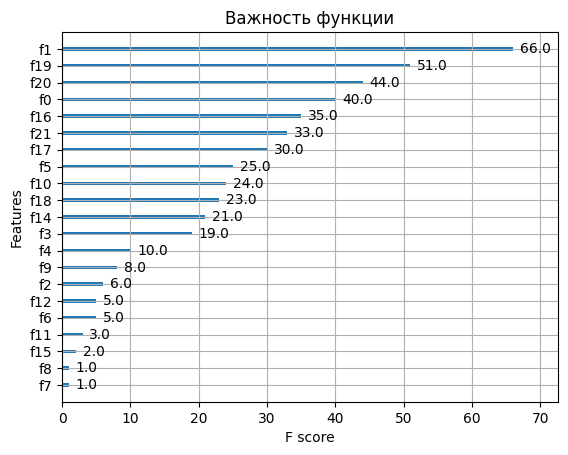

In [ ]:
# Визуализация важности признаков
plt.figure(figsize=(10, 8))
plot_importance(best_model)
plt.title('Важность функции')
plt.show()

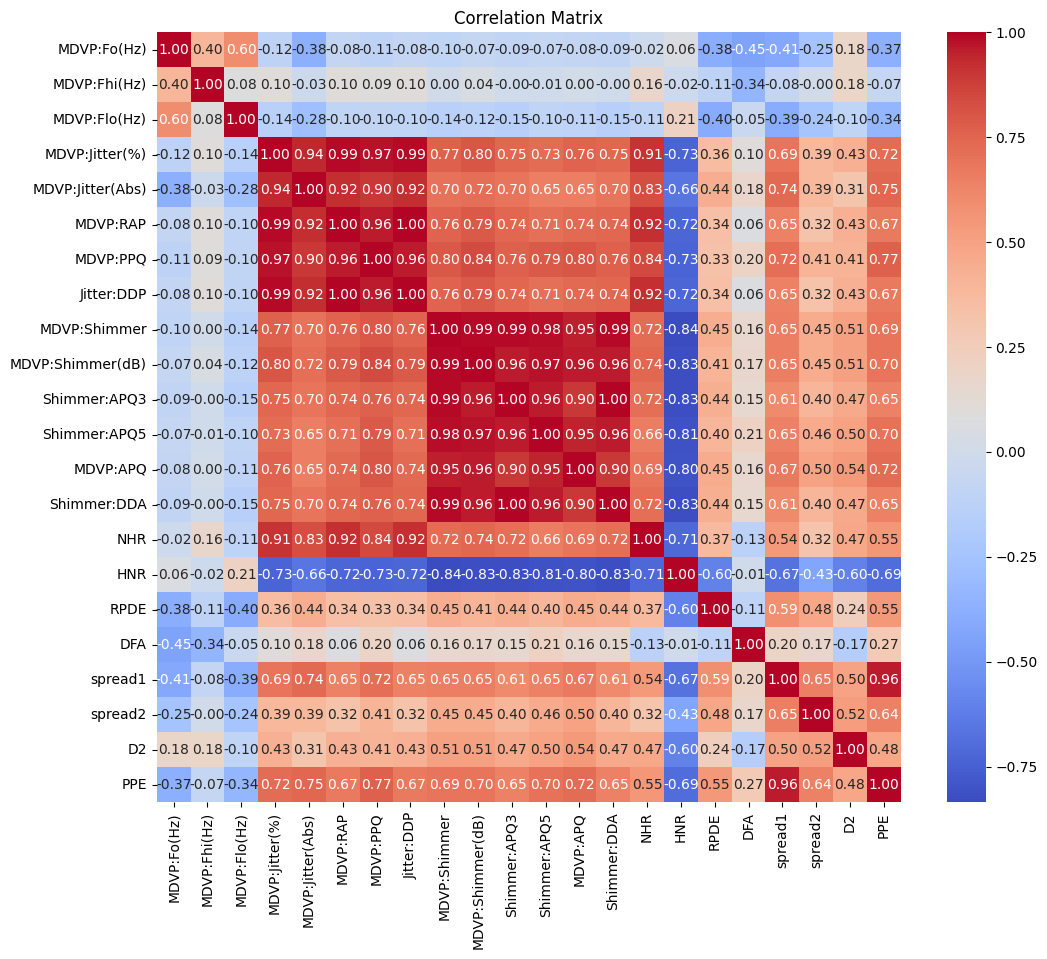

In [ ]:
# Матрица корреляции признаков
plt.figure(figsize=(12, 10))
corr_matrix = data.drop('status', axis=1).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

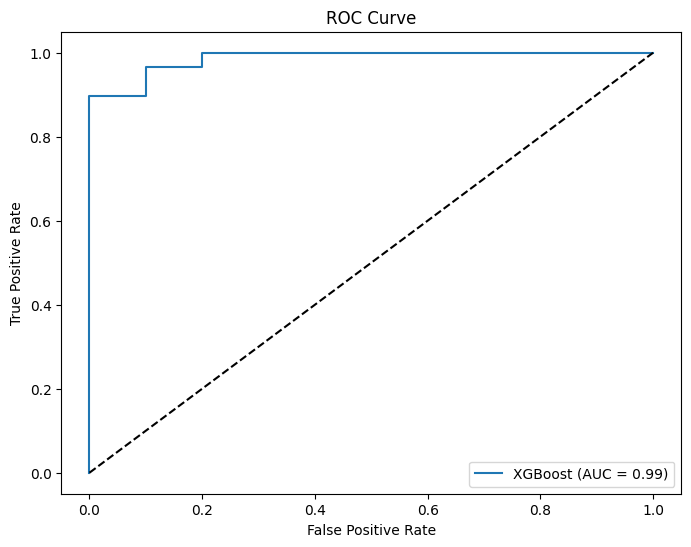

In [ ]:
# ROC кривая и AUC
y_prob = best_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()